In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pprint import pprint

In [2]:
# Pull CSV Files
happiness_path = "Resources/DataPanelWHR2021C2.csv"
mortality_path = "Resources/MortalityDataWHR2021C2.csv"
regions_path = "Resources/All Countries/all.csv"

# Read CSV - Create Dataframes
happy_df = pd.read_csv(happiness_path, parse_dates=['year'])
happy_df.head()
regions_df = pd.read_csv(regions_path)
regions_df = regions_df.rename(columns={'name': 'Country name'}) 
happy_region_df =  pd.merge(happy_df, regions_df,
                                 how='left', on='Country name')

# Display the data table for preview
happy_region_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,2008-01-01,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Afghanistan,2009-01-01,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
2,Afghanistan,2010-01-01,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
3,Afghanistan,2011-01-01,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
4,Afghanistan,2012-01-01,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,...,AF,AFG,4.0,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN


In [3]:

happy_region_df.keys()

#clean_happy_region_df = {[

# #(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
#        'Social support', 'Healthy life expectancy at birth',
#        'Freedom to make life choices', 'Generosity',
#        'Perceptions of corruption', 'Positive affect', 'Negative affect',
#        'alpha-2', 'alpha-3', 'country-code', 'region',
#        'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
#        'intermediate-region-code'],
#       dtype='object')

sort=happy_region_df['year'].drop_duplicates()
sort.sort_values()

list_2020_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2020-01-01"])

# list_2020_countries['year'] =""
# list_2020_countries['Life Ladder'] = ""
# list_2020_countries['Log GDP per capita'] = ""
# list_2020_countries['Social support'] = ""
# list_2020_countries['Healthy life expectancy at birth'] = ""
# list_2020_countries['Freedom to make life choices', 'Generosity'] = ""
# list_2020_countries['Perceptions of corruption'] = ""
# list_2020_countries['Positive affect'] = ""
# list_2020_countries['Negative affect'] = ""
# list_2020_countries['alpha-2'] = ""
# list_2020_countries['alpha-3'] = ""
# list_2020_countries['Pcountry-code'] = ""
# list_2020_countries['region'] = "" 
# list_2020_countries['sub-region'] = ""                     
# list_2020_countries['intermediate-region'] = ""
# list_2020_countries['region-code'] = ""                    
# list_2020_countries['sub-region-code'] = ""
# list_2020_countries['intermediate-region-code'] = ""

list_2020_countries
list_2020_data_df =  pd.merge(list_2020_countries, happy_region_df,
                                 how='left', on='Country name')
list_2020_data_df
list_2011_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2011-01-01"])
list_2011_countries
list_2011_data =  pd.merge(list_2011_countries, list_2020_data_df,
                                 how='left', on='Country name')
list_2013_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2013-01-01"])
list_2013_countries
list_2013_data =  pd.merge(list_2013_countries, list_2011_data,
                                 how='left', on='Country name')
list_2019_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2019-01-01"])
list_2019_countries
list_2019_data =  pd.merge(list_2019_countries, list_2013_data,
                                 how='left', on='Country name')
list_2014_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2014-01-01"])
list_2014_countries
list_2014_data =  pd.merge(list_2014_countries, list_2019_data,
                                 how='left', on='Country name')
list_2018_countries = pd.DataFrame(happy_region_df["Country name"].loc[happy_region_df["year"]=="2018-01-01"])
list_2018_countries
final_data_df =  pd.merge(list_2018_countries, list_2014_data,
                                 how='left', on='Country name')
# # list_2011_count
final_data_df = final_data_df.loc[final_data_df["year"] > '2010-01-01']
# final_data_df = final_data_df['year'].value_counts()
# final_data_df.sort_values()
final_data_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
4,Albania,2011-01-01,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
5,Albania,2012-01-01,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
6,Albania,2013-01-01,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
7,Albania,2014-01-01,4.814,9.378,0.626,67.52,0.735,-0.025,0.883,0.685,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
8,Albania,2015-01-01,4.607,9.403,0.639,67.80,0.704,-0.081,0.885,0.688,...,AL,ALB,8.0,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Zimbabwe,2016-01-01,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1201,Zimbabwe,2017-01-01,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1202,Zimbabwe,2018-01-01,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
1203,Zimbabwe,2019-01-01,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,...,ZW,ZWE,716.0,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


sub-region
Australia and New Zealand          7.280833
Central Asia                       5.397926
Eastern Asia                       5.414407
Eastern Europe                     5.321933
Latin America and the Caribbean    6.262049
Northern Africa                    4.477056
Northern America                   7.344000
Northern Europe                    6.676317
South-eastern Asia                 5.347037
Southern Asia                      4.442167
Southern Europe                    5.604046
Sub-Saharan Africa                 4.447375
Western Asia                       5.886698
Western Europe                     7.038467
Name: Life Ladder, dtype: float64

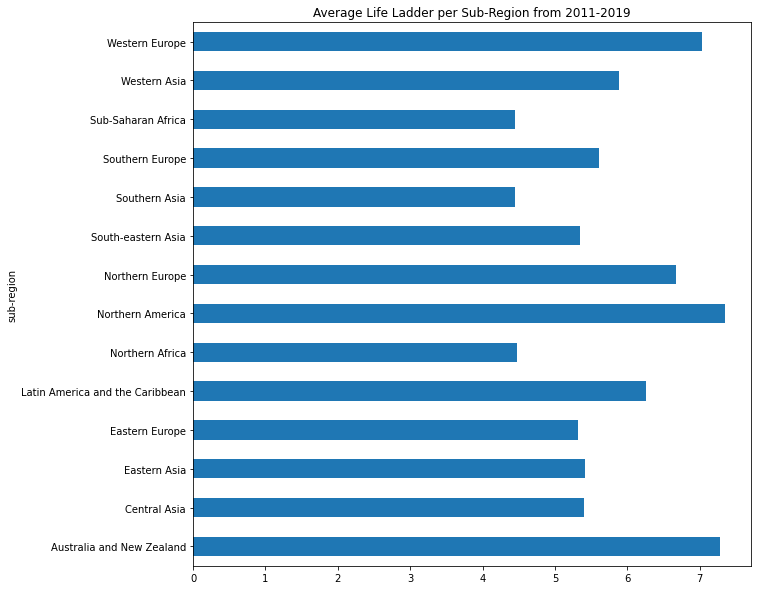

In [36]:
# Average Life Ladder per Sub-Region over time 
# sub_regions = final_data_df['sub-region'].dropna()
# xvals = sub_regions.dropna().unique()
no2020 = final_data_df[final_data_df.year != '2020-01-01']
avgs1 = no2020.groupby('sub-region').mean()['Life Ladder']
# df1 = pd.DataFrame({'Sub-Regions': xvals, 'Avg Life Ladder': yvals})
ax = avgs1.plot.barh(title = 'Average Life Ladder per Sub-Region from 2011-2019').get_figure().savefig('2011-2019AvgLifeLadder.png', bbox_inches='tight')
avgs1

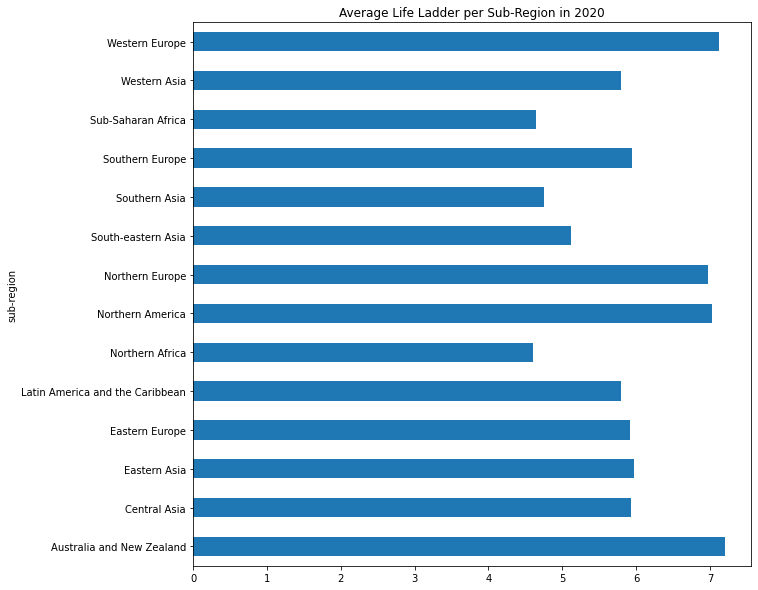

In [34]:
# Just year 2020
df = final_data_df.loc[final_data_df['year'] == '2020-01-01']
#sub_regions = final_data_df['sub-region'].dropna()
#xvals = sub_regions.unique()
avgs20 = df.groupby('sub-region').mean()['Life Ladder']
#df1 = pd.DataFrame({'Sub-Regions': xvals, 'Avg Life Ladder': yvals2020})
ax = avgs20.plot.barh(title = 'Average Life Ladder per Sub-Region in 2020').get_figure().savefig('2020AvgLifeLadder.png', bbox_inches='tight')


 The Average Change in Happiness for Sub-Regions is: 0.1301.
 This insignificant change shows a surprising resilience to Covid in 2020


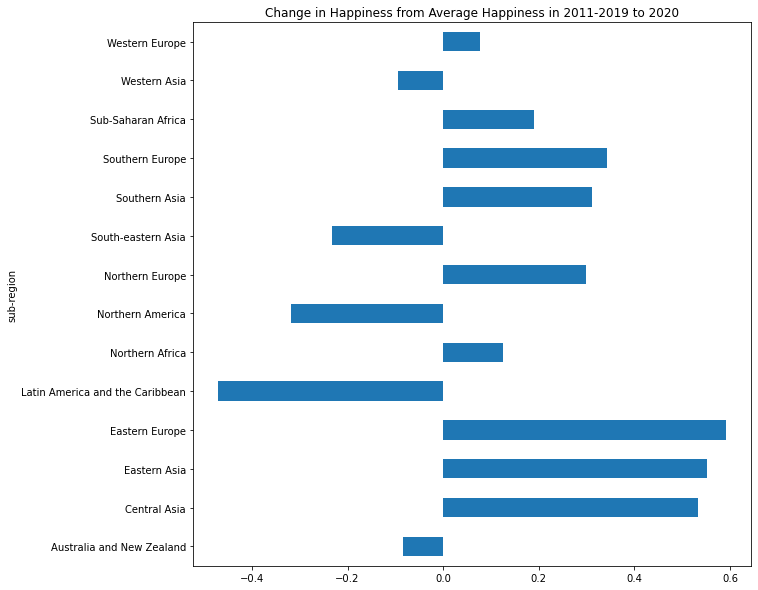

In [33]:
# Changes between avg over years and 2020
difference = avgs20.subtract(avgs1) 
#xvals = sub_regions.unique()
#df1 = pd.DataFrame({'Sub-Regions': xvals, 'Difference from AVG in 2020': difference})
ax = difference.plot.barh(title = 'Change in Happiness from Average Happiness in 2011-2019 to 2020').get_figure().savefig('2011-2020ChangeInHappiness.png', bbox_inches='tight')

print(f' The Average Change in Happiness for Sub-Regions is: {round(np.average(difference), 4)}.\n This insignificant change shows a surprising resilience to Covid in 2020')

In [7]:
happier = []
sadder = []

for row in difference.iteritems():
    if row[1] > 0:
        happier.append(row[0])
    else:
        sadder.append(row[0])
print(f'The Sub-Regions that were\033[1m happier\033[0m than average in 2020 are: {happier}\n\nThe Sub-Regions that were\033[1m more sad\033[0m are: {sadder}')

The Sub-Regions that were happier than average in 2020 are: ['Central Asia', 'Eastern Asia', 'Eastern Europe', 'Northern Africa', 'Northern Europe', 'Southern Asia', 'Southern Europe', 'Sub-Saharan Africa', 'Western Europe']

The Sub-Regions that were more sad are: ['Australia and New Zealand', 'Latin America and the Caribbean', 'Northern America', 'South-eastern Asia', 'Western Asia']


In [8]:
# Average before 2020

happier_regions = no2020.loc[no2020['sub-region'].isin(happier)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
happier_regions2020 = df.loc[df['sub-region'].isin(happier)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
sadder_regions = no2020.loc[no2020['sub-region'].isin(sadder)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])
sadder_regions2020 = df.loc[df['sub-region'].isin(sadder)].groupby('sub-region').mean().drop(columns = ['Life Ladder','Healthy life expectancy at birth','Positive affect','Negative affect','country-code','region-code','sub-region-code','intermediate-region-code'])


<Figure size 576x576 with 0 Axes>

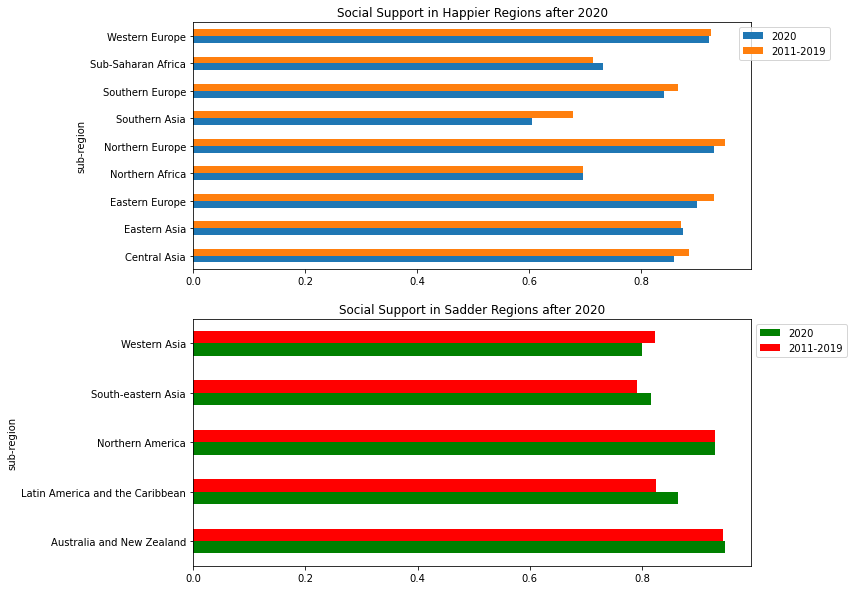

In [9]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

plt.title('Social Support in Happier Regions after 2020')
happier_regions_df = pd.merge(happier_regions, happier_regions2020, on = 'sub-region')
happier_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[0], kind = 'barh').set_title('Social Support in Happier Regions after 2020')
happier_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2011-2019'], bbox_to_anchor=(1.15, 1), loc='upper right')

#plt.legend(['Average Social Support 2020', 'Average Social Support 2019'], bbox_to_anchor=(1.05, 1), loc='upper left')

sadder_regions_df = pd.merge(sadder_regions, sadder_regions2020, on = 'sub-region')
sadder_regions_df[['Social support_x', 'Social support_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Social Support in Sadder Regions after 2020')
plt.legend(['2020', '2011-2019'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("2011-2020SocialSupportSubRegions.png", bbox_inches='tight')

In [29]:
x = list(happier_regions_df['Social support_x']) + list(sadder_regions_df['Social support_x'])
y = list(happier_regions_df['Social support_y']) + list(sadder_regions_df['Social support_y'])

slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
print("r-squared:", r_value**2)


r-squared: 0.9228368286133


<Figure size 576x576 with 0 Axes>

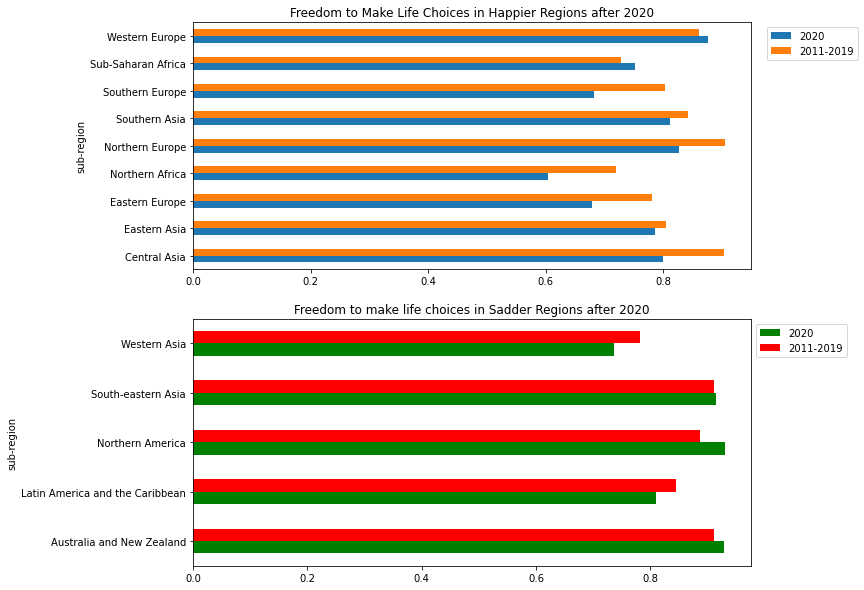

In [10]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[0], kind = 'barh').set_title('Freedom to Make Life Choices in Happier Regions after 2020')
happier_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2011-2019'], bbox_to_anchor=(1.2, 1), loc='upper right')

sadder_regions_df[['Freedom to make life choices_x', 'Freedom to make life choices_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Freedom to make life choices in Sadder Regions after 2020')
plt.legend(['2020', '2011-2019'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("2011-2020FreedomSubRegions.png", bbox_inches='tight')

In [30]:
x = list(happier_regions_df['Freedom to make life choices_x']) + list(sadder_regions_df['Freedom to make life choices_x'])
y = list(happier_regions_df['Freedom to make life choices_y']) + list(sadder_regions_df['Freedom to make life choices_y'])

slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
print("r-squared:", r_value**2)


r-squared: 0.702312102937634


<Figure size 576x576 with 0 Axes>

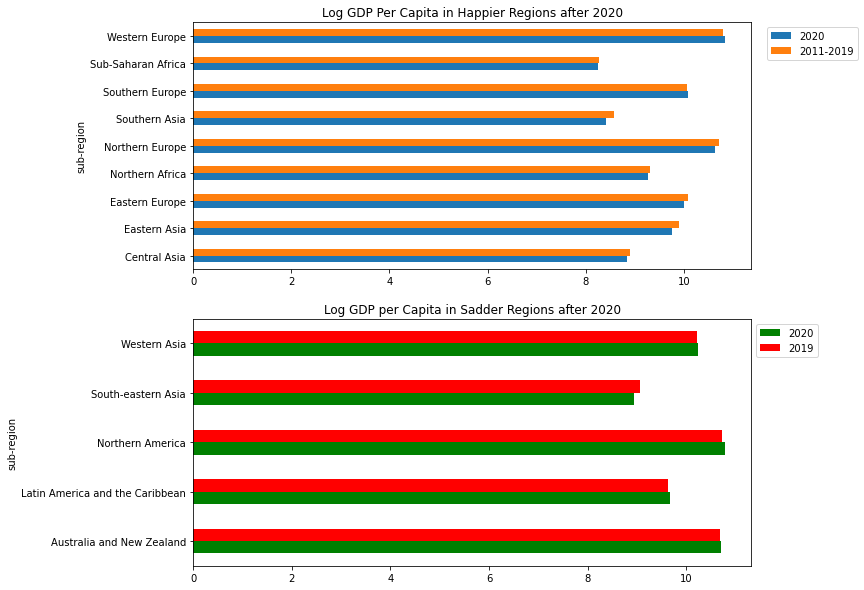

In [11]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[0], kind = 'barh').set_title('Log GDP Per Capita in Happier Regions after 2020')
happier_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2011-2019'], bbox_to_anchor=(1.2, 1), loc='upper right')

sadder_regions_df[['Log GDP per capita_x', 'Log GDP per capita_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Log GDP per Capita in Sadder Regions after 2020')
plt.legend(['2020', '2019'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("2011-2020GDPSubRegions.png", bbox_inches='tight')

<Figure size 576x576 with 0 Axes>

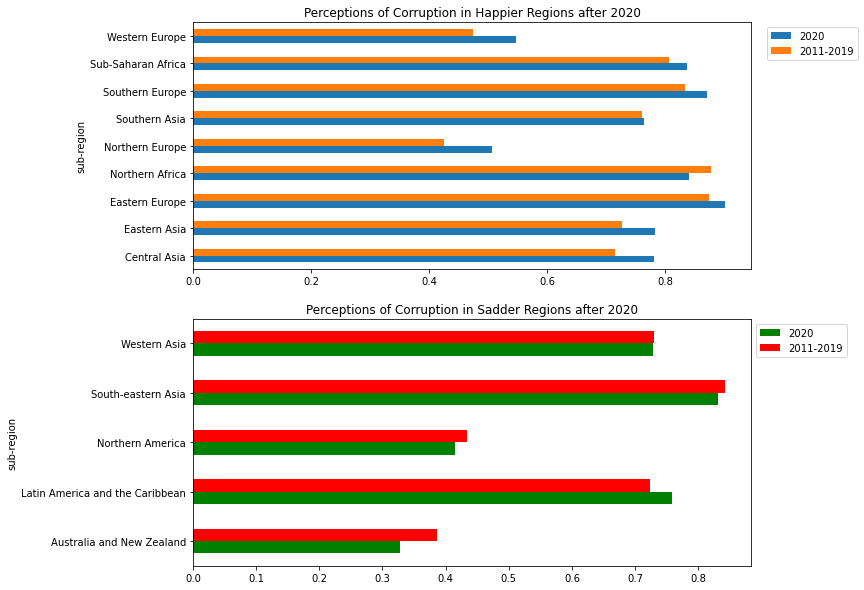

In [12]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[0], kind = 'barh').set_title('Perceptions of Corruption in Happier Regions after 2020')
happier_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2011-2019'], bbox_to_anchor=(1.2, 1), loc='upper right')

sadder_regions_df[['Perceptions of corruption_x', 'Perceptions of corruption_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Perceptions of Corruption in Sadder Regions after 2020')
plt.legend(['2020', '2011-2019'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("2011-2020CorruptionSubRegions.png", bbox_inches='tight')

<Figure size 576x576 with 0 Axes>

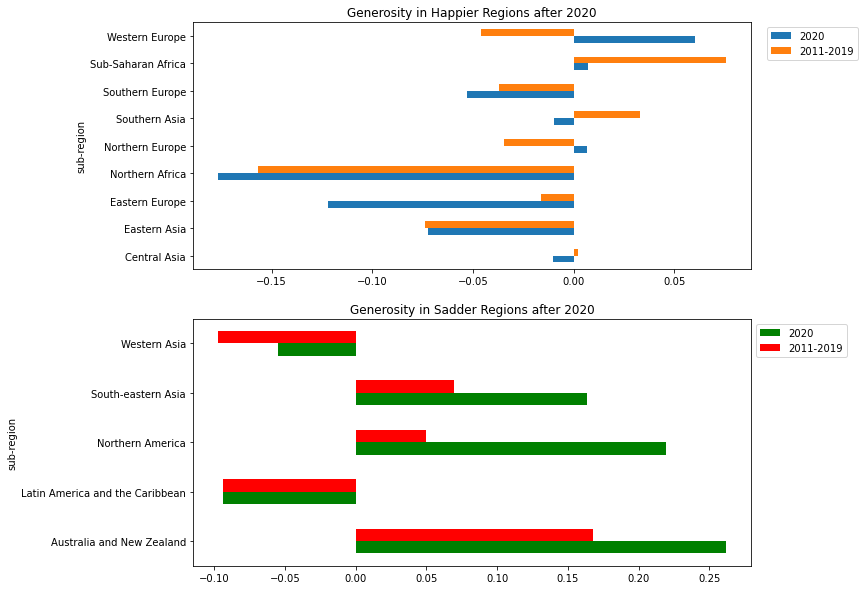

In [13]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure(figsize = (8,8))
fig, axes = plt.subplots(nrows = 2, ncols = 1)

happier_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[0], kind = 'barh').set_title('Generosity in Happier Regions after 2020')
happier_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[0], kind = 'barh').legend(['2020', '2011-2019'], bbox_to_anchor=(1.2, 1), loc='upper right')

sadder_regions_df[['Generosity_x', 'Generosity_y']].plot(ax=axes[1], kind = 'barh', color = ['green','red'])
plt.title('Generosity in Sadder Regions after 2020')
plt.legend(['2020', '2011-2019'], bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
fig.savefig("2011-2020GenerositySubRegions.png", bbox_inches='tight')

In [14]:
# TRY THE WHOLE CODE BUT GROUP BY COUNTRY TO TRY AND GET CORRELATION NUMBER (don't print any graphs for this)
# 5 line graph (region), x axis 2011-2020, y axis -> do life ladder first then the rest social factors
# box plot per region x axis, countries life ladder rates (y-axis) are population samples within region, refer to ANOVA activity in class 